In [1]:
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json

sns.set(context="paper", style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
runs = []
for config_file in glob("../results/200811_cifar10_experiment/*/config.json"):
    with open(config_file) as infile:
        config = pd.Series(json.load(infile))
    with open(config_file[:-11] + "run.json") as infile:
        result = pd.Series(json.load(infile)["result"], dtype=np.float32)
    run_data = pd.concat([config, result])
    runs.append(run_data)
runs_all = pd.concat(runs, axis=1).T

In [3]:
runs_all.head()

,batch_size,batchnorm,bias_loc,bias_prior,bias_scale,burnin,cycles,data,inference,lr,...,skip,temperature,warmup,weight_loc,weight_prior,weight_scale,width,lp_mean,lp_std,lp_stderr
0,64,True,0,gaussian,1,10,5,cifar10,SGLD,0.0005,...,1,1,20,0,gaussian,0.7,50,-4.19023,6.20144,0.0620144
1,64,True,0,gaussian,1,10,5,cifar10,SGLD,0.0005,...,1,1,20,0,uniform,1.41,50,NaN,NaN,NaN
2,64,True,0,gaussian,1,10,5,cifar10,SGLD,0.0005,...,1,1,20,0,laplace,0.7,50,-3.25308,3.36164,0.0336164
3,64,True,0,gaussian,1,10,5,cifar10,SGLD,0.0005,...,1,1,20,0,student-t,2.83,50,-1.57777,1.47507,0.0147507
4,64,True,0,gaussian,1,10,5,cifar10,SGLD,0.0005,...,1,1,20,0,student-t,0.7,50,-2.01504,1.77739,0.0177739


In [4]:
runs_selected = runs_all.query("weight_prior in ['gaussian', 'uniform', 'laplace', 'cauchy', 'student-t']")

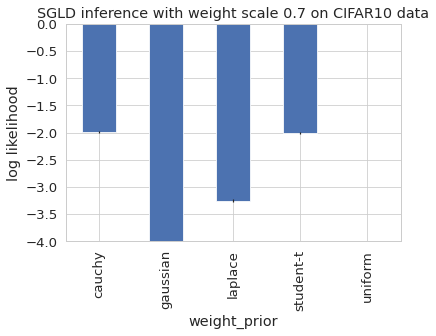

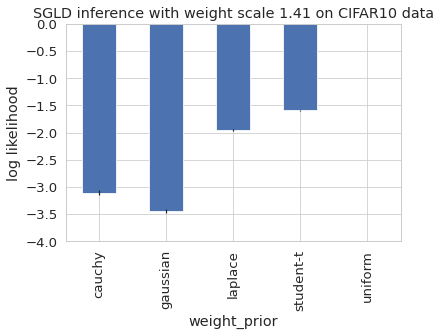

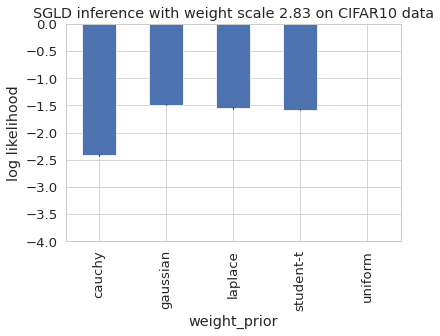

In [8]:
for scale in [0.7, 1.41, 2.83]:
    df = runs_selected.sort_values(["weight_prior", "weight_scale"]).query(f"weight_scale == {scale}")
    df.plot(x="weight_prior", y="lp_mean", yerr="lp_stderr", kind="bar", legend=False)
    plt.title(f"SGLD inference with weight scale {scale} on CIFAR10 data")
    plt.ylabel("log likelihood")
    plt.ylim(-4,0)
    plt.show()

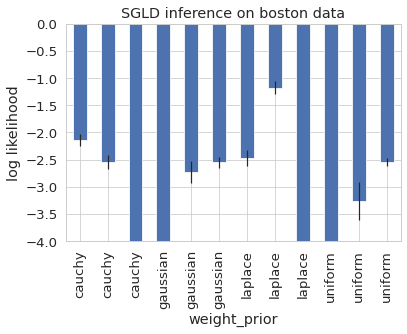

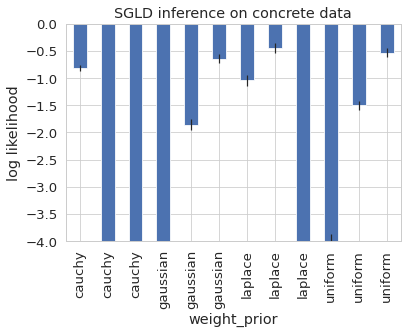

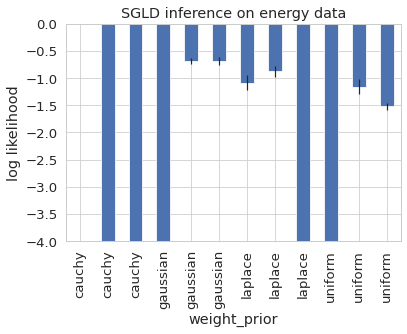

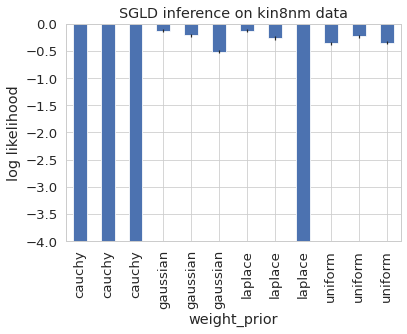

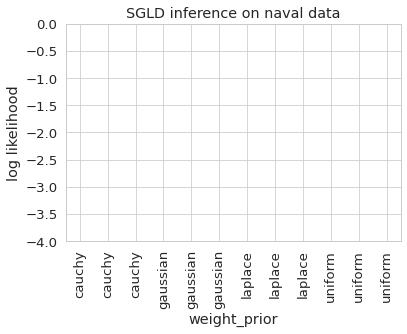

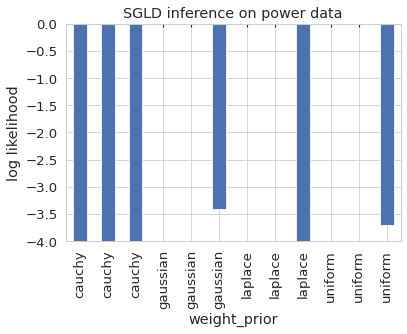

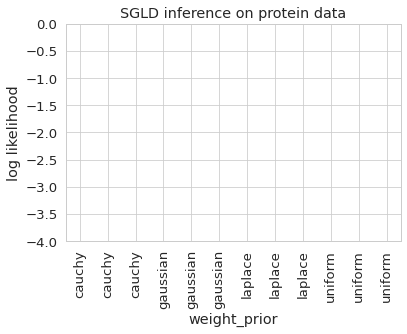

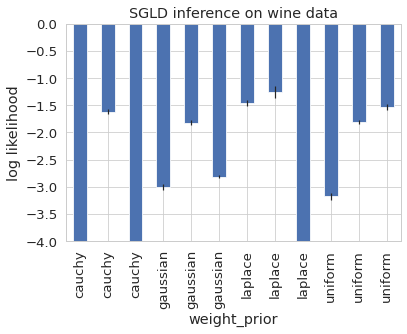

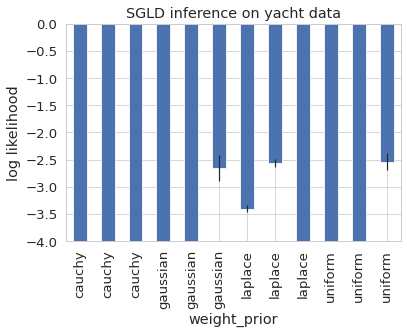

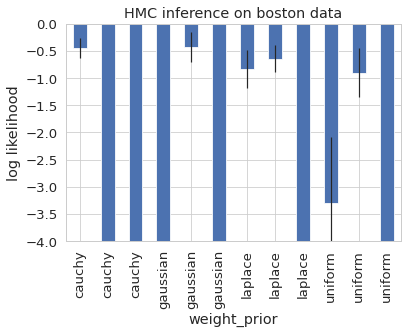

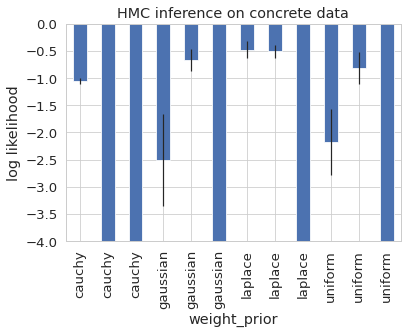

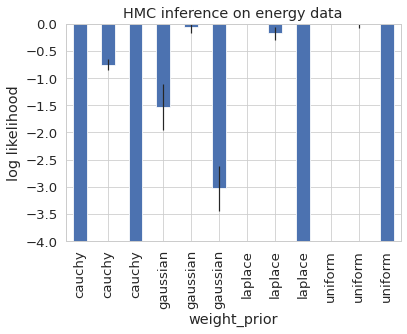

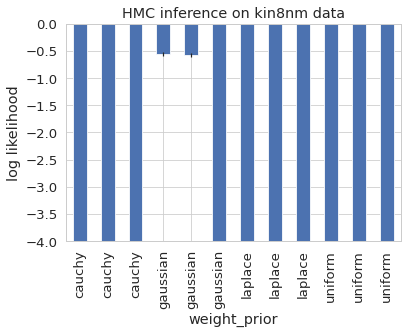

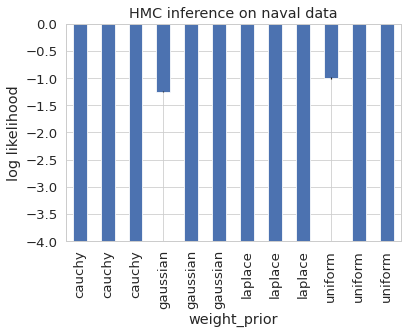

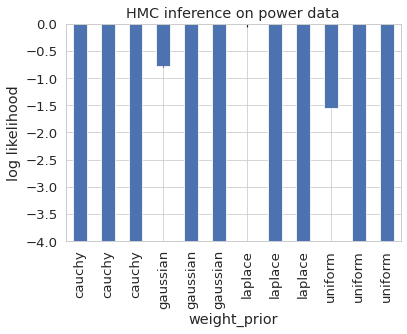

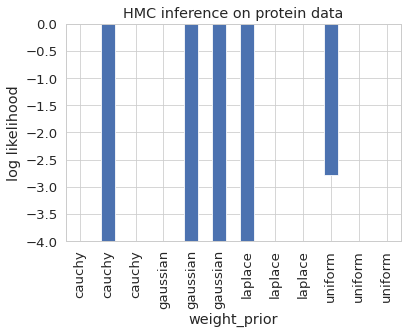

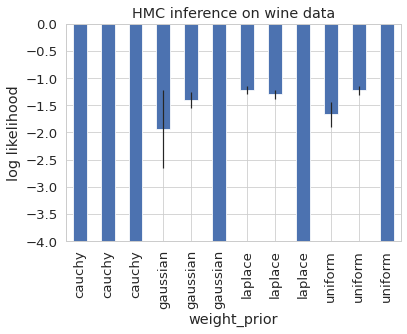

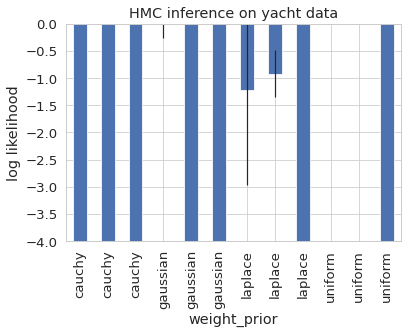

In [5]:
for inference in ["SGLD", "HMC"]:
    for data in ["boston", "concrete", "energy", "kin8nm",
                    "naval", "power", "protein", "wine", "yacht"]:
        df = runs_selected.query(f"inference == '{inference}' & burnin==5000 & data == 'UCI_{data}'"
                                ).sort_values(["weight_prior", "weight_scale"])
        df.plot(x="weight_prior", y="lp_mean", yerr="lp_stderr", kind="bar", legend=False)
        plt.title(f"{inference} inference on {data} data")
        plt.ylabel("log likelihood")
        plt.ylim(-4,0)
        plt.show()